In [1]:
from main import *
from utils import load_session
from preprocess import resize_and_pad

In [2]:
class CFG:
    image_size = IMAGE_SIZE
    conf_thres = 0.01
    iou_thres = 0.1

cfg = CFG()

In [3]:
session = load_session(PATH_MODEL)

c:\Users\HI\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [4]:
session.get_providers()

['CPUExecutionProvider']

In [5]:
from PIL import Image, ImageDraw

In [6]:
image_cv = cv2.imread("sample/2.jpg")

In [7]:
image, ratio, (padd_left, padd_top) = resize_and_pad(image_cv, new_shape=cfg.image_size)
img_norm = normalization_input(image)

In [8]:

pred = infer(session, img_norm)

In [9]:

pred = postprocess(pred)[0]
'''
1 - bath size
9 - x,y,width,height, 0,1,2,3,4 probability for each class
8400 - number of possible detected objects
'''

(211, 4)


'\n1 - bath size\n9 - x,y,width,height, 0,1,2,3,4 probability for each class\n8400 - number of possible detected objects\n'

In [11]:
paddings = np.array([padd_left, padd_top, padd_left, padd_top])
pred[:,:4] = (pred[:,:4] - paddings) / ratio


In [12]:
pred.shape

(22, 6)

In [13]:
pred[0]

array([504.7800293 , 197.76989746, 640.81225586, 369.53863525,
       156.20555115,   4.        ])

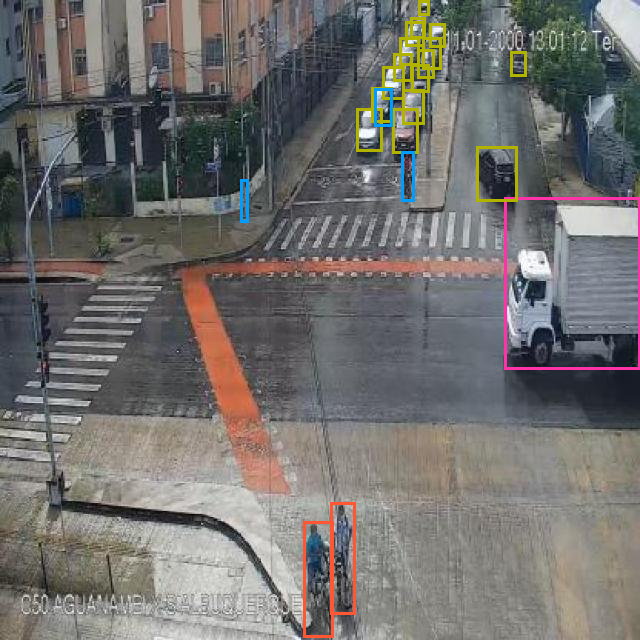

In [14]:
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_cv)
visualize(image, pred)